In [1]:
# Alyssa Cox
# Machine Learning HW3: Exploration of Data

In [3]:
import pandas as pd
import math
import numpy as np

In [4]:
def get_df(file):
    '''
    Reads a csv file into a pandas dataframe

    Inputs:
        file: CSV file to read, as a string

    Returns: A pandas data frame
    '''
    df = pd.read_csv(file)
    return df

In [4]:
get_df("credit-data.csv") # this will return the dataframe for the credit data

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,60629,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,60637,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,60625,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,60804,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,60629,0,0.606291,23684.0,9,0,4,0,2.0


In [5]:
def get_count_by_characteristic(file, characteristic):
    '''
    Gets counts, in a dataframe grouped by a
    certain characteristic.

    Inputs:
            file: the CSV file to be read, as a string
            characteristic: the characteristic you want to see counts by

    Returns: dataframe where the first column is the characteristic and
    the second column is the count.
    '''
    df_main = get_df(file)

    sorted = df_main.groupby(characteristic).groups
    list_0 = []
    list_1 = []
    for i in sorted:
        list_0.append(i)
        list_1.append(len(sorted[i]))

    new_df = pd.Series(list_1, list_0)
    return new_df

In [6]:
#Let's see what the distribution looks like for some of these columns. 
#First, let's check out the number of open credit lines and loans. 
get_count_by_characteristic("credit-data.csv", "NumberOfOpenCreditLinesAndLoans")

0      1888
1      4438
2      6666
3      9058
4     11609
5     12931
6     13614
7     13245
8     12562
9     11355
10     9624
11     8321
12     7005
13     5667
14     4546
15     3645
16     3000
17     2370
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
37        7
38       13
39        9
40       10
41        4
42        8
43        8
44        2
45        8
46        3
47        2
48        6
49        4
50        2
51        2
52        3
53        1
54        4
56        2
57        2
58        1
dtype: int64

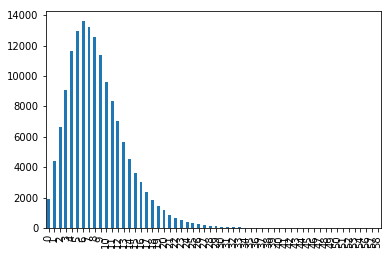

In [9]:
#Looks like most people have between 4-9 open lines of credit. Let's graph the distrbution now. 
import matplotlib.pyplot as plt
lines_df = get_count_by_characteristic("credit-data.csv", "NumberOfOpenCreditLinesAndLoans")
lines_df.plot(x=0, y=1, kind="bar")
plt.show()
#As we can see, this data is heavily right-skewed. This makes sense because having several lines of credit 
#is necessary for a good score, but too many can be harmful.

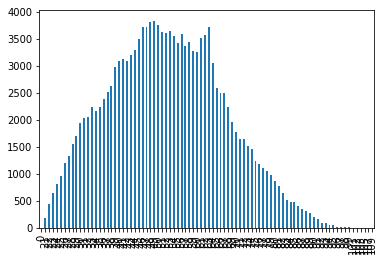

0         1
21      183
22      434
23      641
24      816
25      953
26     1193
27     1338
28     1560
29     1702
30     1937
31     2038
32     2050
33     2239
34     2155
35     2246
36     2379
37     2521
38     2631
39     2987
40     3093
41     3122
42     3082
43     3208
44     3294
45     3502
46     3714
47     3719
48     3806
49     3837
       ... 
76     1183
77     1099
78     1054
79      981
80      876
81      774
82      647
83      512
84      480
85      483
86      407
87      357
88      313
89      276
90      198
91      154
92       93
93       87
94       47
95       45
96       18
97       17
98        6
99        9
101       3
102       3
103       3
105       1
107       1
109       2
dtype: int64

In [15]:
#Let's try plotting the distribution for another variable: age
age_df = get_count_by_characteristic("credit-data.csv", "age")
age_df.plot(x=0, y=1, kind="bar")
plt.show()
#Looks like there are some really elderly people on this list. Let's get the raw numbers. 
get_count_by_characteristic("credit-data.csv", "age")
#There is data for several people who are over 100 years old--this seems unusual. 
#Additionally, there's one entry for someone who is 0 years old--this is an outlier. Perhaps it is an error.

In [5]:
#Using this function, we can also get counts for a specific value for a column, 
#if we don't want to return counts for the entire column.
def get_counts_by_value(file, column, value):
    '''
    Returns the count for any value specified
    It's like get_count_by_characteristic,
    but returns the count for one value, not all of them.

    Inputs:
            file: CSV to be read, as a string
            column: the column containing the specific value
            value: the specific value you want a count for

    Returns: Count, an int
    '''
    df = get_df(file)
    index = df.columns.get_loc(column) + 1
    count = 0
    for tup in df.itertuples():
        if tup[index] == value:
            count += 1
    return count

In [6]:
#For example, let's see exactly how many people are 50 years old:
get_counts_by_value("credit-data.csv", "age", 50)

3753

In [11]:
#Number of people in this dataset who live in the 60637 (Hyde Park) zipcode:
get_counts_by_value("credit-data.csv", "zipcode", 60637)

16625

In [17]:
#It would be interesting to get the mean, median, mode, min, and max for all columns. 
#Here are the functions to do that. 

def get_most(file, column):
    '''
    Gets the specific value from a specific column that has the
    most requests of all the unique values in that column.

    Inputs:
            file: CSV file to be read, as a string
            column: the column from which you want the
            value with the highest count.
    Returns: Tuple containing the count and the value.
                ex: (5600, 60615)
    '''

    df = get_df(file)
    grouped = df.groupby(column).groups
    list_most = []
    for group in grouped:
        list_most.append((len(grouped[group]), group))
    most = 0
    most_tup = None
    for item in list_most:
        if item[0] > most:
            most = item[0]
            most_tup = (item)
    return most_tup

def get_mean(df, column):
    '''
    Calculates the mean value for a given column.

    Inputs:
            df: a pandas dataframe
            column: specific column from which to generate a mean value

    Returns: mean, an integer
    '''

    if type(column) is str:
        index = df.columns.get_loc(column) + 1
    elif type(column) is int:
        index = column
    list_mean = []
    for tup in df.itertuples():
        if math.isnan(tup[index]):
            continue
        else:
            list_mean.append(tup[index])
    list_mean.sort()
    total = 0
    for i in list_mean:
        total = total + i
    mean = total / len(list_mean)
    new_mean = float("{:.2f}".format(mean))
    return new_mean

def get_max_and_min(df, column):
    '''
    Retrieves the max and min values from a specified column.

     Inputs:
            df: a pandas dataframe
            column: specific column from which to generate max and min

    Returns: a tuple containing (min, max)
    '''

    index = df.columns.get_loc(column) + 1
    list_vals = []
    for tup in df.itertuples():
        list_vals.append(tup[index])
    list_vals.sort()
    min = list_vals[0]
    max = list_vals[-1]
    return(min, max)

def get_stat_summ(file, column):
    '''
    Calculates the mean, median, and mode of a specific column

    Inputs:
            file: csv to be read
            column: column must have integer data

    Returns: string detailing the values of the mean, median, and mode
    '''
    df = get_df(file)

    mean = get_mean(df, column)

    index = df.columns.get_loc(column) + 1
    list_vals = []
    for tup in df.itertuples():
        list_vals.append(tup[index])
    list_vals.sort()

    if len(list_vals) % 2 == 0:
        length = len(list_vals)
        med_1 = list_vals[int(length / 2) - 1]
        med_2 = list_vals[int(length / 2)]
        median = (med_1 + med_2) / 2
    elif len(list_vals) % 2 == 1:
        length = len(list_vals)
        median = (length // 2)

    most_tup = get_most(file, column)
    mode = most_tup[1]
    return ("For column " + column + ", mean is " + str(mean) + ", median is " + str(median) +
            " , mode is " + str(mode))

In [21]:
print(get_stat_summ("credit-data.csv", "SeriousDlqin2yrs"))
print(get_stat_summ("credit-data.csv", "RevolvingUtilizationOfUnsecuredLines"))
print(get_stat_summ("credit-data.csv", "age"))
print(get_stat_summ("credit-data.csv", "zipcode"))
print(get_stat_summ("credit-data.csv", "NumberOfTime30-59DaysPastDueNotWorse"))
print(get_stat_summ("credit-data.csv", "DebtRatio"))
print(get_stat_summ("credit-data.csv", "MonthlyIncome"))
print(get_stat_summ("credit-data.csv", "NumberOfOpenCreditLinesAndLoans"))
print(get_stat_summ("credit-data.csv", "NumberOfTimes90DaysLate"))
print(get_stat_summ("credit-data.csv", "NumberRealEstateLoansOrLines"))
print(get_stat_summ("credit-data.csv", "NumberOfTime60-89DaysPastDueNotWorse"))
print(get_stat_summ("credit-data.csv", "NumberOfDependents"))

For column SeriousDlqin2yrs, mean is 0.07, median is 0.0 , mode is 0
For column RevolvingUtilizationOfUnsecuredLines, mean is 6.05, median is 0.154180737 , mode is 0.0
For column age, mean is 52.3, median is 52.0 , mode is 49
For column zipcode, mean is 60648.81, median is 60629.0 , mode is 60625
For column NumberOfTime30-59DaysPastDueNotWorse, mean is 0.42, median is 0.0 , mode is 0
For column DebtRatio, mean is 353.01, median is 0.366507841 , mode is 0.0
For column MonthlyIncome, mean is 6670.22, median is nan , mode is 5000.0
For column NumberOfOpenCreditLinesAndLoans, mean is 8.45, median is 8.0 , mode is 6
For column NumberOfTimes90DaysLate, mean is 0.27, median is 0.0 , mode is 0
For column NumberRealEstateLoansOrLines, mean is 1.02, median is 1.0 , mode is 0
For column NumberOfTime60-89DaysPastDueNotWorse, mean is 0.24, median is 0.0 , mode is 0
For column NumberOfDependents, mean is 0.76, median is 0.0 , mode is 0.0


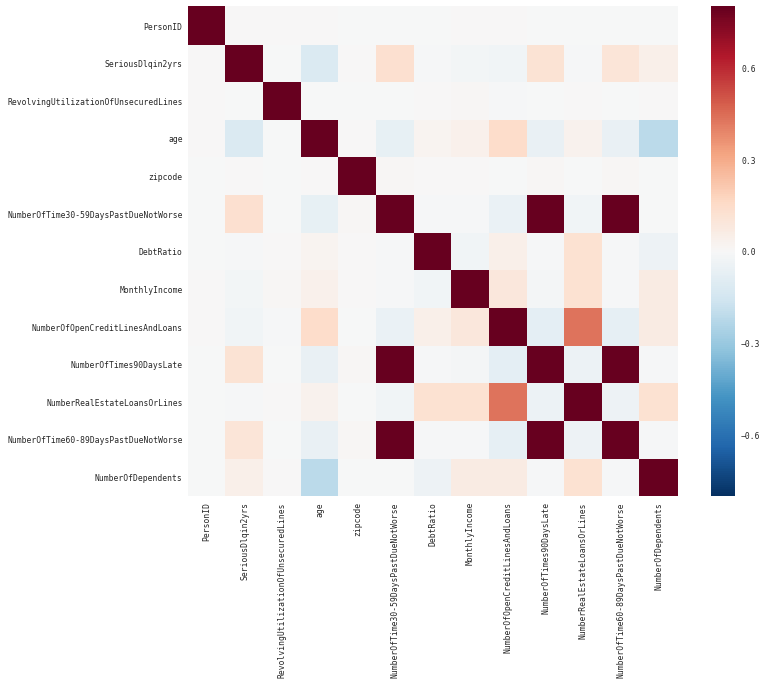

In [27]:
#It makes sense that certain variables in the dataset might be correlated with each other. 
#For example, SeriousDlqin2yrs and NumberOfTimes90DaysLate. 
#A correlation matrix transformed into a heatmap can visualize these relationships. 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
df = get_df("credit-data.csv")
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

plt.show()

In [ ]:
#The columns that are most highly positively correlated with each other (dark red) are:
#NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, and NumberOfTimes90DaysLate
#This makes sense because people who pay late past 90 days are automatically paying late past 30-89 days. 
#NumberOfOpenCreditLinesAndLoans and NumberRealEstateLoansOrLines are also pretty positively correlated. 
#There is a slight negative correlation between age and paying late.